In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/car_clean.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Cars_Age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [3]:
# average selling_price of cars
avg_car_price = df["selling_price"].mean().round(2)

print(f" The average selling price of the cars is ${avg_car_price}")

 The average selling price of the cars is $501378.18


In [4]:
# most common fuel type 

fuel_type = df["fuel"].value_counts().index[0]
fuel_count = df["fuel"].value_counts().iloc[0]

print(f"The most common fuel type is {fuel_type} with {fuel_count} entries")

The most common fuel type is Diesel with 3741 entries


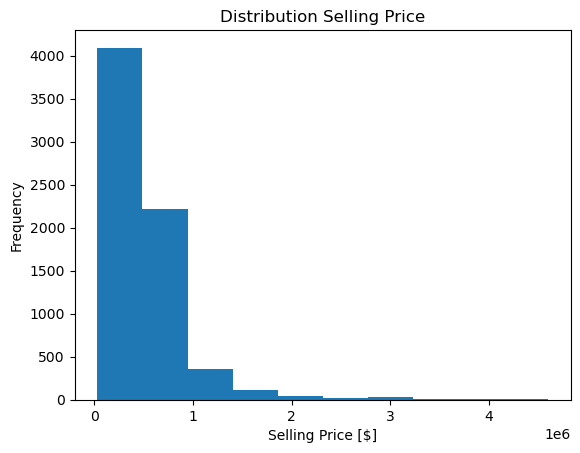

In [5]:
# hist of "selling_price"
plt.hist(df["selling_price"])

plt.xlabel("Selling Price [$]")
plt.ylabel("Frequency")
plt.title("Distribution Selling Price")

plt.show()

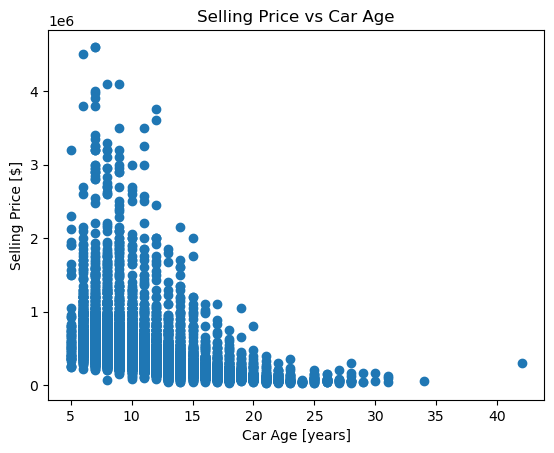

In [6]:
# scatter plot of "cars_age vs selling_price"
plt.scatter(df["Cars_Age"], df["selling_price"])

plt.xlabel("Car Age [years]")
plt.ylabel("Selling Price [$]")
plt.title("Selling Price vs Car Age")

plt.show()

In [7]:
# average "selling price" grouped by "fuel type"
df.groupby("fuel")["selling_price"].mean().round(2).sort_values(ascending=False)

fuel
Diesel    620448.48
Petrol    363717.34
CNG       300499.95
LPG       200421.05
Name: selling_price, dtype: float64

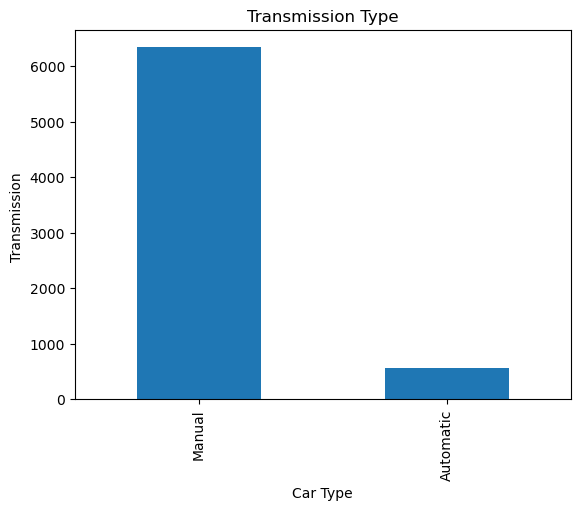

In [8]:
# count cars per trnasmission type
transmission_count = df["transmission"].value_counts()

# bar chart of cars per transmission type
transmission_count.plot(kind='bar')

# add labes and title 
plt.title("Transmission Type")
plt.xlabel("Car Type")
plt.ylabel("Transmission ")


plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 6906 non-null   object 
 1   year                 6906 non-null   int64  
 2   selling_price        6906 non-null   int64  
 3   km_driven            6906 non-null   int64  
 4   fuel                 6906 non-null   object 
 5   seller_type          6906 non-null   object 
 6   transmission         6906 non-null   object 
 7   owner                6906 non-null   object 
 8   mileage(km/ltr/kg)   6906 non-null   float64
 9   engine               6906 non-null   float64
 10  max_power            6906 non-null   float64
 11  seats                6906 non-null   float64
 12  Cars_Age             6906 non-null   int64  
 13  price_per_kilometer  6906 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 755.5+ KB


In [11]:
highest_mileage= df["mileage(km/ltr/kg)"].idxmax()
df.loc[highest_mileage]

print(f"Highest Mileage: {highest_mileage}")
print(df.loc[highest_mileage])

Highest Mileage: 35
name                   Maruti Alto 800 CNG LXI Optional
year                                               2019
selling_price                                    330000
km_driven                                         10000
fuel                                                CNG
seller_type                                  Individual
transmission                                     Manual
owner                                      Second Owner
mileage(km/ltr/kg)                                33.44
engine                                            796.0
max_power                                          40.3
seats                                               4.0
Cars_Age                                              6
price_per_kilometer                         9868.421053
Name: 35, dtype: object


In [12]:
# corelation between milleage and selling price
# df.corr("mileage(km/ltr/kg)", "selling_price")
df[["mileage(km/ltr/kg)", "selling_price"]] .corr(method='pearson')

,mileage(km/ltr/kg),selling_price
mileage(km/ltr/kg),1.00000,-0.12105
selling_price,-0.12105,1.00000


In [13]:
# find corelation of numeric columns
all_data = df.corr(numeric_only=True)
all_data

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,Cars_Age,price_per_kilometer
year,1.000000,0.485645,-0.374980,0.349364,-0.007614,0.148499,0.044313,-1.000000,0.345472
selling_price,0.485645,1.000000,-0.169558,-0.121050,0.478464,0.688878,0.223538,-0.485645,0.947989
km_driven,-0.374980,-0.169558,1.000000,-0.196912,0.253357,0.052689,0.200104,0.374980,-0.097414
mileage(km/ltr/kg),0.349364,-0.121050,-0.196912,1.000000,-0.579822,-0.390335,-0.460321,-0.349364,-0.340180
engine,-0.007614,0.478464,0.253357,-0.579822,1.000000,0.683980,0.668062,0.007614,0.585023
max_power,0.148499,0.688878,0.052689,-0.390335,0.683980,1.000000,0.279185,-0.148499,0.727277
seats,0.044313,0.223538,0.200104,-0.460321,0.668062,0.279185,1.000000,-0.044313,0.320155
Cars_Age,-1.000000,-0.485645,0.374980,-0.349364,0.007614,-0.148499,-0.044313,1.000000,-0.345472
price_per_kilometer,0.345472,0.947989,-0.097414,-0.340180,0.585023,0.727277,0.320155,-0.345472,1.000000


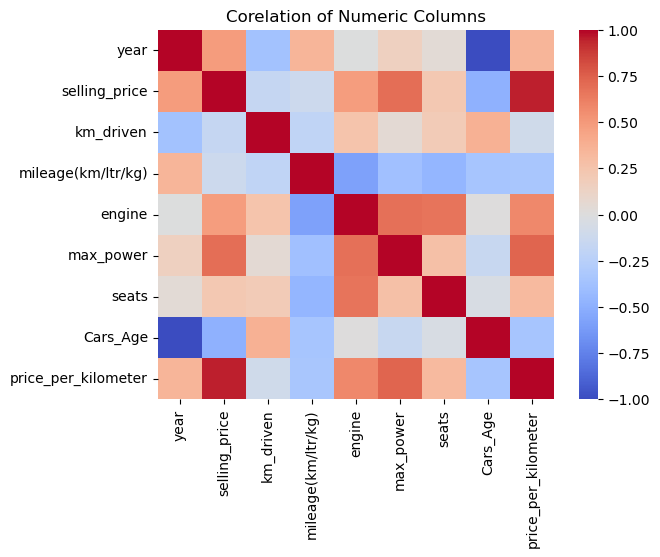

In [14]:
# plot heatmap
sns.heatmap(all_data, cmap='coolwarm')

# add title
plt.title("Corelation of Numeric Columns")
plt.show()

Theres a high corelation between Price_per_kilometer and selling_price

In [15]:
# price of manual vs automatic cars
df.groupby("transmission")["selling_price"].median()

transmission
Automatic    800000.0
Manual       385000.0
Name: selling_price, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 6906 non-null   object 
 1   year                 6906 non-null   int64  
 2   selling_price        6906 non-null   int64  
 3   km_driven            6906 non-null   int64  
 4   fuel                 6906 non-null   object 
 5   seller_type          6906 non-null   object 
 6   transmission         6906 non-null   object 
 7   owner                6906 non-null   object 
 8   mileage(km/ltr/kg)   6906 non-null   float64
 9   engine               6906 non-null   float64
 10  max_power            6906 non-null   float64
 11  seats                6906 non-null   float64
 12  Cars_Age             6906 non-null   int64  
 13  price_per_kilometer  6906 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 755.5+ KB


In [17]:
# avg selling price for each year of manufacture
avg_sp_per_year = df.groupby("year")["selling_price"].mean().sort_values(ascending=False)
print(avg_sp_per_year.head())

year
2018    825749.553897
2019    795583.291667
2020    786548.338710
2017    708006.173913
2016    653180.339105
Name: selling_price, dtype: float64


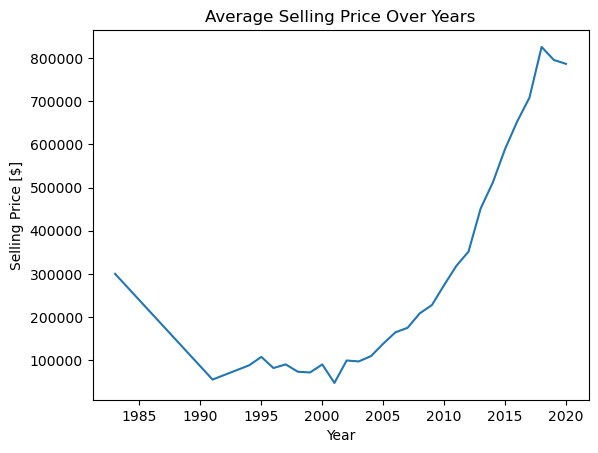

In [18]:
# plot line chart of selling price over the years
plt.plot(df.groupby("year")["selling_price"].mean())

# add titles and axis labels
plt.xlabel("Year")
plt.ylabel("Selling Price [$]")
plt.title("Average Selling Price Over Years")

plt.show()

In [19]:
df.groupby("fuel")["selling_price"].median().sort_values(ascending=False)

fuel
Diesel    520000.0
CNG       320000.0
Petrol    310000.0
LPG       195500.0
Name: selling_price, dtype: float64

In [20]:
df.groupby("fuel")["selling_price"].mean().sort_values(ascending=False)

fuel
Diesel    620448.482224
Petrol    363717.339629
CNG       300499.946429
LPG       200421.052632
Name: selling_price, dtype: float64

In [21]:
# find the most expensive car per fuel type
most_expensive_per_fuel = df.groupby("fuel")["selling_price"].idxmax()

# view the full car details
df.loc[most_expensive_per_fuel]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Cars_Age,price_per_kilometer
4961,Maruti Ertiga VXI CNG Limited Edition,2014,545000,35000,CNG,Individual,Manual,First Owner,22.8,1373.0,80.90,7.0,11,23903.508772
283,Mercedes-Benz GL-Class 220d 4MATIC Sport,2018,4600000,7976,Diesel,Individual,Automatic,First Owner,17.9,2143.0,170.00,5.0,7,256983.240223
2783,Hyundai i10 Sportz 1.1L LPG,2015,375000,60000,LPG,Individual,Manual,First Owner,19.2,1086.0,68.05,5.0,10,19531.250000
133,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.00,5.0,8,431578.947368


In [32]:
# extract brand from under 'name' column
df["brand"] = df["name"].str.split().str[0]

df["brand"].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

In [36]:
# count frequency for each brand
brand_counts = df["brand"].value_counts()
brand_counts.head(10)

brand
Maruti        2165
Hyundai       1267
Mahindra       723
Tata           647
Honda          362
Ford           361
Toyota         357
Chevrolet      216
Renault        206
Volkswagen     174
Name: count, dtype: int64

In [63]:
# common combinations of fuel type and transmission
group = (
    df.groupby(["fuel", "transmission"])
    .agg(best_combinations=('fuel', 'count'))
    .sort_values(by="best_combinations", ascending=False)
    
)
group    

,,best_combinations
fuel,transmission,
Diesel,Manual,3457
Petrol,Manual,2791
Diesel,Automatic,284
Petrol,Automatic,280
CNG,Manual,56
LPG,Manual,38
